# Домашнее задание 4

## Задание №1
Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [2]:
with open('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding='utf-8') as f:
    start_hp = f.read()
start_hp = start_hp.lower()
start_hp = start_hp.split()
punct = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-"
start_hp = [w.strip(punct) for w in start_hp]
start_hp = ' '.join(start_hp)

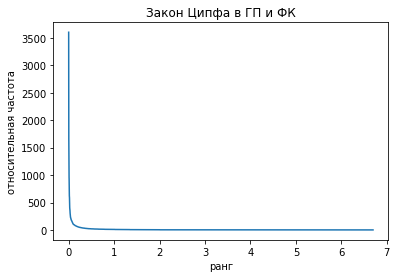

In [29]:
import matplotlib
import matplotlib.pyplot as plt
counts = {}
for word in start_hp.split():
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

plt.title('Закон Ципфа в ГП и ФК')
plt.ylabel('относительная частота')
plt.xlabel('ранг')
Y = []
X = []
i = 0
for k, v in sorted_counts:
    Y.append(v)
    X.append(i/1000)
    i += 1
plt.plot(X, Y)
plt.show()

Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [66]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()
clear_hp = lemmatizer.lemmatize(start_hp)
sw = stopwords.words('english')
sw.append("'s")
sw.append("'m")
sw.append("n't")
sw.append("'ve")
sw.append("'re")
sw.append("'d")
sw.append("'ll")
clear_hp = [w for w in word_tokenize(clear_hp) if w not in sw]
clear_hp = ' '.join(clear_hp)
with open('clear_hp.txt', 'w', encoding='utf-8') as f:
    f.write(clear_hp)

In [97]:
clear_counts = {}
for word in clear_hp.split():
    if word in clear_counts:
        clear_counts[word] += 1
    else:
        clear_counts[word] = 1
sorted_counts = sorted(clear_counts.items(), key=lambda x: x[1], reverse=True)
most_common = sorted_counts[:30]
print(most_common)

[('harry', 1305), ('said', 794), ('ron', 427), ('hagrid', 366), ('could', 301), ('hermione', 267), ('back', 257), ('one', 250), ('got', 204), ('get', 192), ('like', 188), ('know', 185), ('see', 177), ('professor', 172), ('looked', 169), ('snape', 167), ('dumbledore', 156), ('would', 153), ('around', 141), ('dudley', 137), ('going', 134), ('go', 130), ('something', 128), ('think', 121), ('never', 121), ('right', 121), ('malfoy', 121), ('uncle', 120), ('look', 119), ('time', 115)]


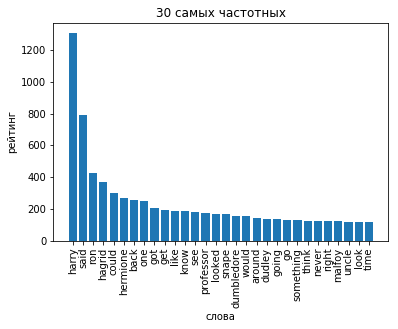

In [102]:
plt.title('30 самых частотных')
plt.ylabel('рейтинг')
plt.xlabel('слова')
X = [i for i in range(30)]
Y = []
X_name = []
for k, v in most_common:
    Y.append(v)
    X_name.append(k)
plt.bar(X, Y)
plt.xticks(X, X_name, rotation=90)
plt.show()